In [ ]:
%pip install opencv-python
import cv2

# DUST Dataset

The DUTS dataset is a widely used benchmark in salient object detection, a computer vision task focused on identifying and segmenting the most conspicuous objects within an image. Introduced by Wang et al. in 2017, DUTS is notable for its large scale and challenging scenarios. It comprises two subsets: a training set with 10,553 images and a test set with 5,019 images. The training images are sourced from the ImageNet DET training and validation sets, while the test images are drawn from the ImageNet DET test set and the SUN dataset. Each image in DUTS is accompanied by accurate pixel-level ground truth annotations, manually labeled by 50 subjects, facilitating precise evaluation of saliency detection algorithms.

[DUST Dataset](https://openaccess.thecvf.com/content_cvpr_2017/html/Wang_Learning_to_Detect_CVPR_2017_paper.html)

# 1. Data Analysis
The purpose of data analysis in this context is to understand the characteristics and quality of the dataset, ensuring it is suitable for the development and evaluation of salient object detection models. First, we load the data to access its contents and then check its format to verify compatibility and consistency. Next, we examine the dimensions of the images and corresponding masks to ensure they align correctly, as mismatched dimensions could affect model training. Analyzing pixel values in both images and masks provides insights into data distribution and highlights any anomalies or inconsistencies. Computing the average dimensions helps identify typical sizes, guiding preprocessing steps like resizing or cropping.Computing the Standard deviation of salient coverage across masks provides a sense of object prevalence in the dataset, informing model expectations. Checking unique pixel values in masks ensures that labels are correctly encoded, which is crucial for accurate training.  Finally, detecting outliers helps identify problematic samples that could skew results. Each step is essential to prepare the dataset effectively, validate its integrity, and tailor it to the requirements of salient object detection tasks. To ensure thoroughness, we should also check for missing files, incomplete annotations, and overall dataset balance.

### Library

In [ ]:
import os
import random
import numpy as np
from PIL import Image
from tqdm import tqdm
import matplotlib.pyplot as plt
from collections import Counter


In [ ]:
train_normalized_image_path = "/content/drive/MyDrive/DUST-NORMALIZED/DUTS-TR/DUTS-TR-Normalized-Images"
train_normalized_mask_path = "/content/drive/MyDrive/DUST-NORMALIZED/DUTS-TR/DUTS-TR-Normalized-Masks"

test_normalized_image_path = "/content/drive/MyDrive/DUST-NORMALIZED/DUTS-TE/DUTS-TE-Normalized-Images"
test_normalized_mask_path = "/content/drive/MyDrive/DUST-NORMALIZED/DUTS-TE/DUTS-TE-Normalized-Masks"


### 1.1 Load Dataset

In [ ]:
test_image_path = "/content/drive/MyDrive/DUTS/DUTS-TE/DUTS-TE-Image"
test_mask_path = "/content/drive/MyDrive/DUTS/DUTS-TE/DUTS-TE-Mask"

test_images = os.listdir(test_image_path)
test_masks = os.listdir(test_mask_path)

print(f"Number of Test images: {len(test_images)}")
print(f"Number of Test masks: {len(test_masks)}")

not_missing_masks = [img for img in test_images if img in test_masks]
if not_missing_masks:
    print(f"Missing masks for {len(not_missing_masks)} images.")
else:
    print("All Test images have corresponding masks.")

Number of Test images: 5019
Number of Test masks: 5019
All Test images have corresponding masks.


In [ ]:
train_image_path = "/content/drive/MyDrive/DUTS/DUTS-TR/DUTS-TR-Image"
train_mask_path = "/content/drive/MyDrive/DUTS/DUTS-TR/DUTS-TR-Mask"

train_images = os.listdir(train_image_path)
train_masks = os.listdir(train_mask_path)

print(f"Number of images: {len(train_images)}")
print(f"Number of masks: {len(train_masks)}")

not_missing_masks = [img for img in train_images if img in train_masks]
if not_missing_masks:
    print(f"Missing masks for {len(not_missing_masks)} images.")
else:
    print("All images have corresponding masks.")

Number of images: 10553
Number of masks: 10553
All images have corresponding masks.


### 1.2 Check file format

In [ ]:
image_formats = {os.path.splitext(file)[1] for file in train_images}
mask_formats = {os.path.splitext(file)[1] for file in train_masks}
print(f"Train Image formats: {image_formats}")
print(f"Tain Mask formats: {mask_formats}")

image_formats = {os.path.splitext(file)[1] for file in test_images}
mask_formats = {os.path.splitext(file)[1] for file in test_masks}
print(f"Test Image formats: {image_formats}")
print(f"Test Mask formats: {mask_formats}")

Train Image formats: {'.jpg'}
Tain Mask formats: {'.png'}
Test Image formats: {'.jpg'}
Test Mask formats: {'.png'}


### 1.3 Image and Mask Dimensions

In [ ]:
print("\nSample Image and Mask Dimensions:")
for i in range(min(5, len(train_images))):
    img = Image.open(os.path.join(train_image_path, train_images[i]))
    mask = Image.open(os.path.join(train_mask_path, train_masks[i]))
    print(f"Train Image {train_images[i]}: {img.size}, Mode: {img.mode}")
    print(f"Train Mask {train_masks[i]}: {mask.size}, Mode: {mask.mode}")


Sample Image and Mask Dimensions:
Train Image n07749582_3185.jpg: (400, 320), Mode: RGB
Train Mask n07697313_7784.png: (400, 267), Mode: L
Train Image n07742313_18031.jpg: (263, 400), Mode: RGB
Train Mask sun_abqgcypsgfshmapt.png: (400, 300), Mode: L
Train Image n07747607_30004.jpg: (400, 300), Mode: RGB
Train Mask n04019541_6474.png: (400, 267), Mode: L
Train Image n07745940_21281.jpg: (267, 400), Mode: RGB
Train Mask n07930864_26109.png: (309, 400), Mode: L
Train Image n07739125_90.jpg: (400, 400), Mode: RGB
Train Mask n04409515_1768.png: (400, 267), Mode: L


In [ ]:
print("\nSample Image and Mask Dimensions:")
for i in range(min(5, len(test_images))):
    img = Image.open(os.path.join(test_image_path, test_images[i]))
    mask = Image.open(os.path.join(test_mask_path, test_masks[i]))
    print(f"Test Image {test_images[i]}: {img.size}, Mode: {img.mode}")
    print(f"Test Mask {test_masks[i]}: {mask.size}, Mode: {mask.mode}")


Sample Image and Mask Dimensions:
Test Image sun_atfjmvocfgmzfqzj.jpg: (300, 400), Mode: RGB
Test Mask sun_ddzjpzhthgbasedh.png: (400, 318), Mode: L
Test Image sun_aassqtmpflmukleu.jpg: (282, 400), Mode: RGB
Test Mask sun_ahephhhxejrjiita.png: (400, 274), Mode: L
Test Image sun_ahtpezffaxfyadot.jpg: (400, 300), Mode: RGB
Test Mask ILSVRC2012_test_00044169.png: (400, 300), Mode: L
Test Image sun_afuzusgbewygvixv.jpg: (400, 400), Mode: RGB
Test Mask sun_arquycqcegnqwvqc.png: (400, 400), Mode: L
Test Image sun_afuxtrtrsegcvkni.jpg: (400, 300), Mode: RGB
Test Mask ILSVRC2012_test_00043273.png: (400, 300), Mode: L


### 1.4 Display an image and mask

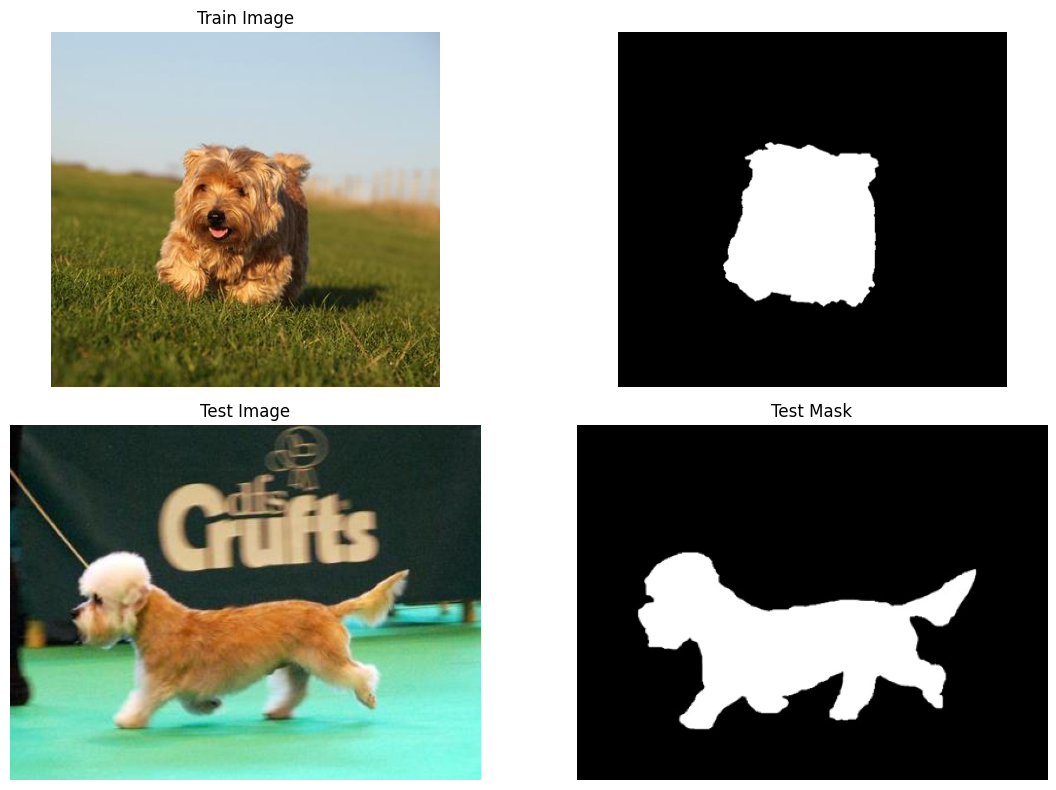

In [ ]:
train_sample_image = Image.open("/content/drive/MyDrive/DUTS/DUTS-TR/DUTS-TR-Image/ILSVRC2012_test_00000004.jpg")
train_sample_mask = Image.open("/content/drive/MyDrive/DUTS/DUTS-TR/DUTS-TR-Mask/ILSVRC2012_test_00000004.png")

test_sample_image = Image.open("/content/drive/MyDrive/DUTS/DUTS-TE/DUTS-TE-Image/ILSVRC2012_test_00000003.jpg")
test_sample_mask = Image.open("/content/drive/MyDrive/DUTS/DUTS-TE/DUTS-TE-Mask/ILSVRC2012_test_00000003.png")

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(train_sample_image)
plt.title('Train Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(train_sample_mask, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(test_sample_image)
plt.title('Test Image')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(test_sample_mask, cmap='gray')
plt.title('Test Mask')
plt.axis('off')

plt.tight_layout()
plt.show()

### 1.5 Analyze pixel values in images

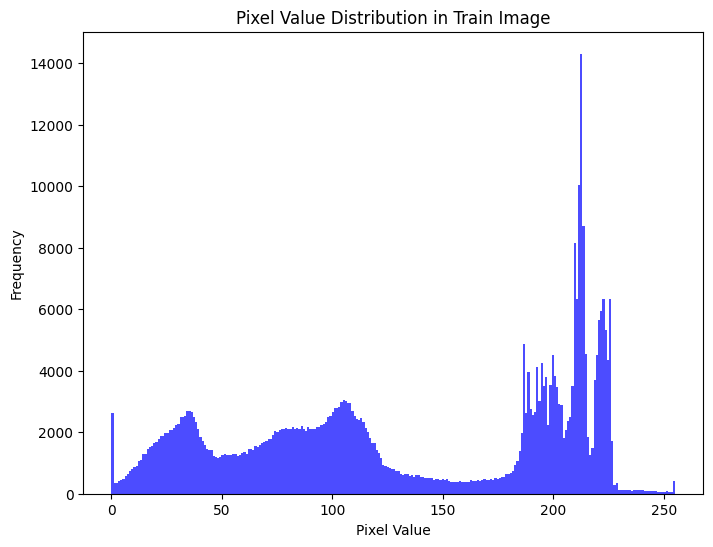

In [ ]:
image_array = np.array(train_sample_image)

plt.figure(figsize=(8, 6))
plt.hist(image_array.ravel(), bins=256, color='blue', alpha=0.7)
plt.title("Pixel Value Distribution in Train Image")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()

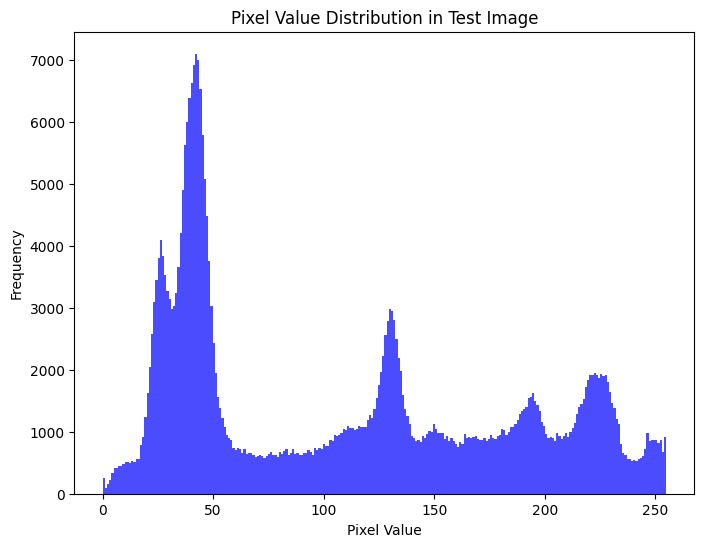

In [ ]:
timage_array = np.array(test_sample_image)

plt.figure(figsize=(8, 6))
plt.hist(timage_array.ravel(), bins=256, color='blue', alpha=0.7)
plt.title("Pixel Value Distribution in Test Image")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()

### 1.5 Analyze pixel values in masks

0 255
____________


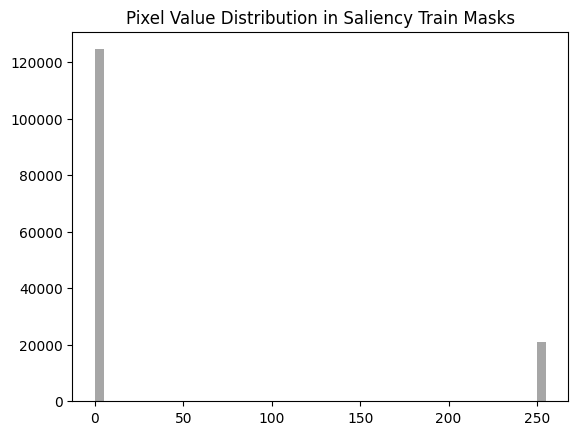

In [ ]:
mask_array = np.array(train_sample_mask)
print(mask_array.min(), mask_array.max())
print("____________")
plt.hist(mask_array.ravel(), bins=50, color='gray', alpha=0.7)
plt.title("Pixel Value Distribution in Saliency Train Masks")
plt.show()

0 255
____________


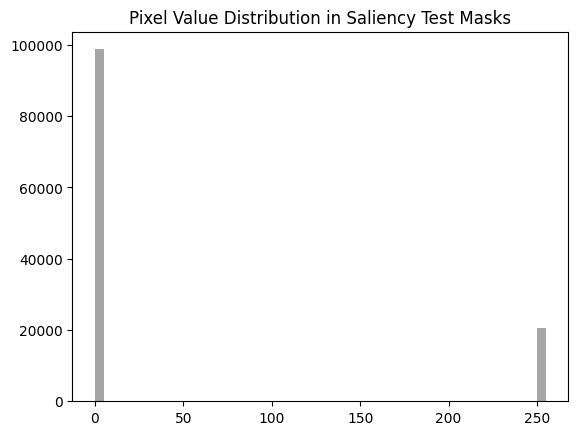

In [ ]:
tmask_array = np.array(test_sample_mask)
print(tmask_array.min(), tmask_array.max())
print("____________")
plt.hist(tmask_array.ravel(), bins=50, color='gray', alpha=0.7)
plt.title("Pixel Value Distribution in Saliency Test Masks")
plt.show()

#### 1.6 Inspect Data Distribution

Counter({0: 123876, 255: 20322, 1: 604, 254: 541, 2: 105, 253: 82, 247: 49, 8: 48, 62: 25, 252: 16, 3: 14, 7: 10, 248: 10, 156: 10, 4: 9, 63: 9, 40: 8, 9: 8, 36: 8, 48: 8, 250: 8, 208: 8, 219: 7, 233: 7, 64: 7, 52: 7, 6: 7, 224: 7, 5: 6, 50: 6, 47: 6, 225: 6, 12: 6, 147: 6, 210: 6, 20: 6, 215: 6, 38: 6, 123: 6, 56: 6, 13: 6, 90: 6, 10: 5, 109: 5, 238: 5, 236: 5, 198: 5, 158: 5, 209: 5, 151: 5, 108: 5, 230: 5, 232: 5, 15: 5, 37: 5, 227: 5, 251: 5, 80: 5, 164: 5, 194: 5, 184: 5, 249: 5, 25: 5, 246: 5, 95: 5, 179: 5, 155: 4, 18: 4, 54: 4, 228: 4, 85: 4, 49: 4, 161: 4, 26: 4, 242: 4, 201: 4, 97: 4, 183: 4, 243: 4, 241: 4, 61: 4, 145: 4, 41: 4, 105: 4, 223: 4, 152: 4, 196: 4, 102: 4, 93: 4, 149: 4, 154: 4, 214: 4, 206: 4, 39: 4, 116: 3, 143: 3, 55: 3, 159: 3, 237: 3, 216: 3, 189: 3, 218: 3, 76: 3, 220: 3, 23: 3, 35: 3, 120: 3, 117: 3, 19: 3, 81: 3, 240: 3, 122: 3, 27: 3, 72: 3, 182: 3, 207: 3, 211: 3, 153: 3, 68: 3, 185: 3, 82: 3, 32: 3, 14: 3, 239: 3, 53: 3, 42: 3, 104: 3, 235: 3, 59: 3, 2

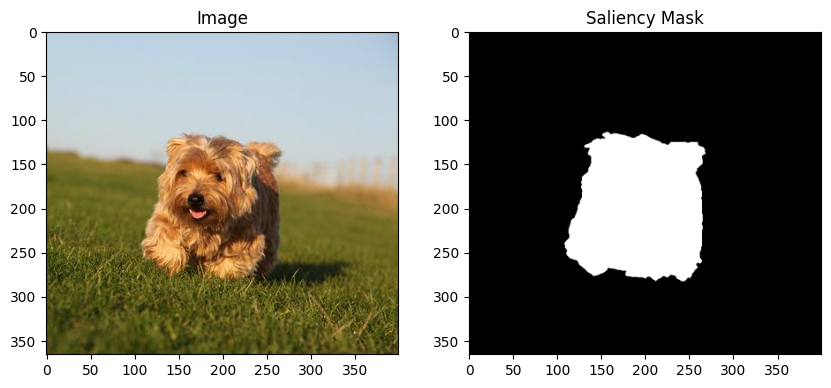

In [ ]:
print(Counter(mask_array.ravel()))
print("____________________________________________________")

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(train_sample_image)
ax[0].set_title("Image")
ax[1].imshow(train_sample_mask, cmap='gray')
ax[1].set_title("Saliency Mask")
plt.show()

Counter({0: 97068, 255: 18949, 254: 921, 1: 911, 2: 474, 253: 466, 252: 229, 3: 183, 251: 85, 4: 80, 5: 30, 250: 23, 10: 20, 57: 19, 247: 18, 150: 17, 7: 16, 235: 15, 6: 15, 231: 14, 54: 14, 20: 14, 220: 14, 8: 13, 145: 13, 249: 13, 19: 13, 16: 13, 15: 12, 246: 11, 243: 11, 234: 11, 43: 11, 28: 11, 153: 11, 229: 11, 219: 10, 190: 10, 232: 10, 193: 10, 236: 10, 237: 10, 244: 10, 156: 10, 242: 10, 248: 9, 135: 9, 241: 9, 136: 9, 31: 9, 17: 9, 13: 9, 11: 9, 34: 9, 12: 9, 37: 8, 191: 8, 230: 8, 124: 8, 70: 8, 60: 8, 223: 8, 161: 8, 80: 8, 239: 8, 184: 8, 33: 8, 59: 7, 115: 7, 38: 7, 183: 7, 41: 7, 214: 7, 211: 7, 226: 7, 162: 7, 95: 7, 165: 7, 22: 7, 26: 7, 186: 7, 67: 7, 228: 7, 200: 7, 164: 7, 212: 7, 160: 7, 76: 7, 215: 7, 61: 6, 203: 6, 233: 6, 77: 6, 137: 6, 171: 6, 152: 6, 96: 6, 102: 6, 173: 6, 176: 6, 109: 6, 74: 6, 238: 6, 62: 6, 134: 5, 101: 5, 221: 5, 98: 5, 23: 5, 125: 5, 146: 5, 49: 5, 245: 5, 225: 5, 72: 5, 166: 5, 14: 5, 240: 5, 139: 5, 110: 5, 66: 5, 18: 5, 189: 5, 65: 5, 2

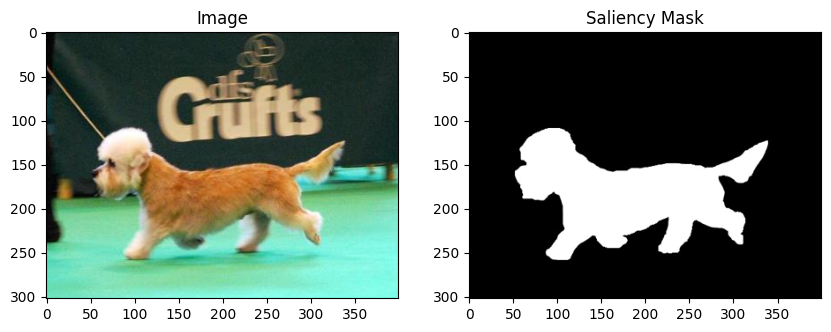

In [ ]:
print(Counter(tmask_array.ravel()))
print("____________________________________________________")

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(test_sample_image)
ax[0].set_title("Image")
ax[1].imshow(test_sample_mask, cmap='gray')
ax[1].set_title("Saliency Mask")
plt.show()

### 1.7 Compute Average and standard deviation of salient coverage

In [ ]:
total_width, total_height = 0, 0
total_mask_width, total_mask_height = 0, 0
salient_area_ratios = []
unique_pixel_values = Counter()
use_sample = False
sample_size = 1000

images = sorted(os.listdir(train_image_path))
masks = sorted(os.listdir(train_mask_path))

# Sampling logic
if use_sample:
    sample_indices = random.sample(range(len(images)), sample_size)
    images = [images[i] for i in sample_indices]
    masks = [masks[i] for i in sample_indices]


print("Processing images and masks...")
for img_file, mask_file in tqdm(zip(images, masks), total=len(images)):
    try:
        img = Image.open(os.path.join(train_image_path, img_file))
        mask = Image.open(os.path.join(train_mask_path, mask_file))

        total_width += img.width
        total_height += img.height

        total_mask_width += mask.width
        total_mask_height += mask.height

        mask_array = np.array(mask, dtype=np.uint8)
        unique_pixel_values.update(mask_array.ravel())

        non_zero_pixels = np.count_nonzero(mask_array)
        total_pixels = mask_array.size
        salient_area_ratios.append(non_zero_pixels / total_pixels)
    except Exception as e:
        print(f"Error processing {img_file} or {mask_file}: {e}")
        continue

avg_width = total_width / len(images)
avg_height = total_height / len(images)
avg_mask_width = total_mask_width / len(masks)
avg_mask_height = total_mask_height / len(masks)
avg_salient_area = np.mean(salient_area_ratios) * 100
std_salient_area = np.std(salient_area_ratios) * 100

print("\nTrain Dataset Statistics:")
print(f"Number of Images & Masks: {len(images)}")
print(f"Average Image Dimensions: {avg_width:.2f} x {avg_height:.2f}")
print(f"Average Mask Dimensions: {avg_mask_width:.2f} x {avg_mask_height:.2f}")
print(f"Average Salient Area: {avg_salient_area:.2f}%")
print(f"Standard Deviation of Salient Area: {std_salient_area:.2f}%")

Processing images and masks...


100%|██████████| 10553/10553 [06:35<00:00, 26.71it/s]


Train Dataset Statistics:
Number of Images & Masks: 10553
Average Image Dimensions: 372.19 x 322.61
Average Mask Dimensions: 372.19 x 322.61
Average Salient Area: 28.41%
Standard Deviation of Salient Area: 15.51%


In [ ]:
total_width, total_height = 0, 0
total_mask_width, total_mask_height = 0, 0
salient_area_ratios = []
unique_pixel_values = Counter()
use_sample = False
sample_size = 1000

images = sorted(os.listdir(test_image_path))
masks = sorted(os.listdir(test_mask_path))

if use_sample:
    sample_indices = random.sample(range(len(images)), sample_size)
    images = [images[i] for i in sample_indices]
    masks = [masks[i] for i in sample_indices]


print("Processing images and masks...")
for img_file, mask_file in tqdm(zip(images, masks), total=len(images)):
    try:
        img = Image.open(os.path.join(test_image_path, img_file))
        mask = Image.open(os.path.join(test_mask_path, mask_file))

        total_width += img.width
        total_height += img.height

        total_mask_width += mask.width
        total_mask_height += mask.height

        mask_array = np.array(mask, dtype=np.uint8)
        unique_pixel_values.update(mask_array.ravel())

        non_zero_pixels = np.count_nonzero(mask_array)
        total_pixels = mask_array.size
        salient_area_ratios.append(non_zero_pixels / total_pixels)
    except Exception as e:
        print(f"Error processing {img_file} or {mask_file}: {e}")
        continue

avg_width = total_width / len(images)
avg_height = total_height / len(images)
avg_mask_width = total_mask_width / len(masks)
avg_mask_height = total_mask_height / len(masks)
avg_salient_area = np.mean(salient_area_ratios) * 100
std_salient_area = np.std(salient_area_ratios) * 100

print("\nTest Dataset Statistics:")
print(f"Number of Images & Masks: {len(images)}")
print(f"Average Image Dimensions: {avg_width:.2f} x {avg_height:.2f}")
print(f"Average Mask Dimensions: {avg_mask_width:.2f} x {avg_mask_height:.2f}")
print(f"Average Salient Area: {avg_salient_area:.2f}%")
print(f"Standard Deviation of Salient Area: {std_salient_area:.2f}%")

Processing images and masks...


100%|██████████| 5019/5019 [03:26<00:00, 24.34it/s]



Test Dataset Statistics:
Number of Images & Masks: 5019
Average Image Dimensions: 382.41 x 321.04
Average Mask Dimensions: 382.41 x 321.04
Average Salient Area: 15.57%
Standard Deviation of Salient Area: 14.07%


### 1.8 Unique pixel values in masks

In [ ]:
def unique_pixel_values (mask_array, threshold = 128):
  binary_mask = (mask_array > threshold).astype(int)  # Convert to 0 and 1
  unique_pixel_values = {value: (binary_mask == value).sum() for value in np.unique(binary_mask)}
  print(f"Unique Pixel Values in Binary Mask: {sorted(unique_pixel_values.keys())}")
  return binary_mask

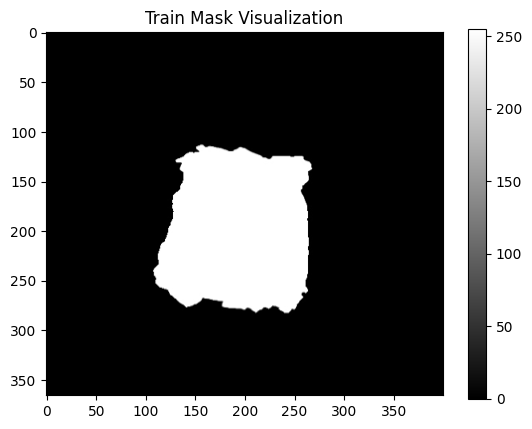

In [ ]:
mask_array = np.array(train_sample_mask)
plt.imshow(mask_array, cmap='gray')
plt.colorbar()
plt.title("Train Mask Visualization")
plt.show()

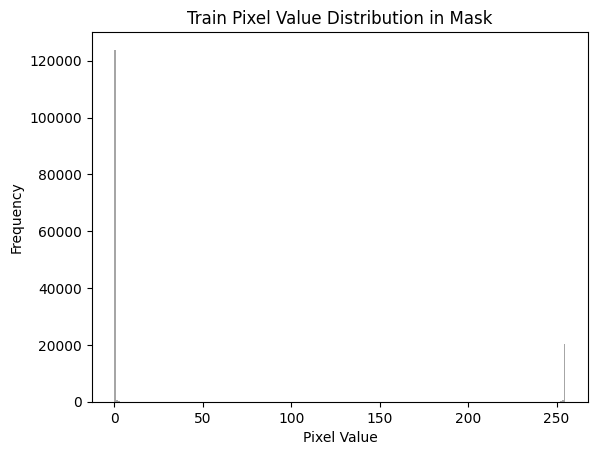

In [ ]:
plt.hist(mask_array.ravel(), bins=256, color='gray', alpha=0.7)
plt.title("Train Pixel Value Distribution in Mask")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()

In [ ]:
train_binary_mask = unique_pixel_values(mask_array)

Unique Pixel Values in Binary Mask: [0, 1]


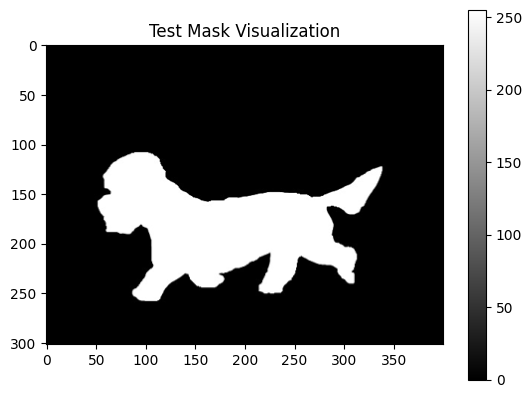

In [ ]:
tmask_array = np.array(test_sample_mask)
plt.imshow(tmask_array, cmap='gray')
plt.colorbar()
plt.title("Test Mask Visualization")
plt.show()

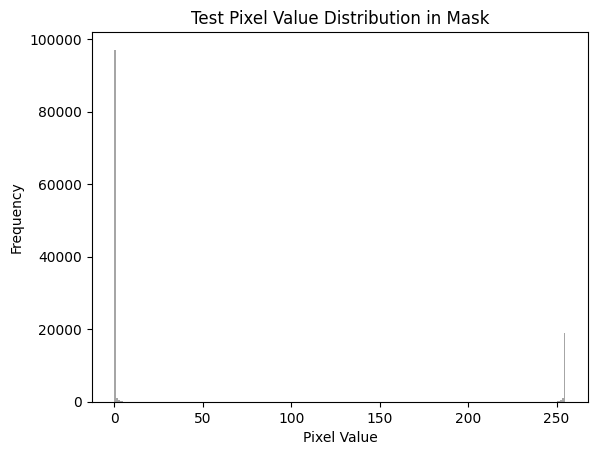

In [ ]:
plt.hist(tmask_array.ravel(), bins=256, color='gray', alpha=0.7)
plt.title("Test Pixel Value Distribution in Mask")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()

In [ ]:
test_binary_mask = unique_pixel_values(tmask_array)

Unique Pixel Values in Binary Mask: [0, 1]


### 1.9 Detecting outlier

Train Calculating dimensions...


100%|██████████| 10553/10553 [02:31<00:00, 69.52it/s] 


Train Calculating salient area ratios...


100%|██████████| 10553/10553 [00:39<00:00, 270.11it/s]


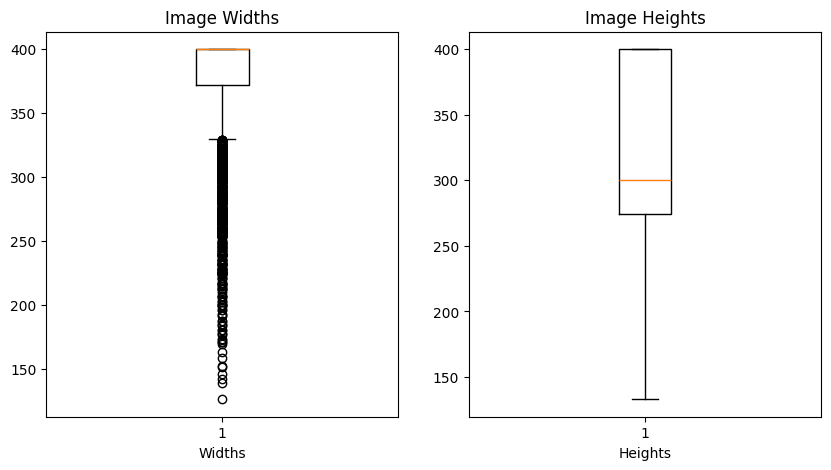

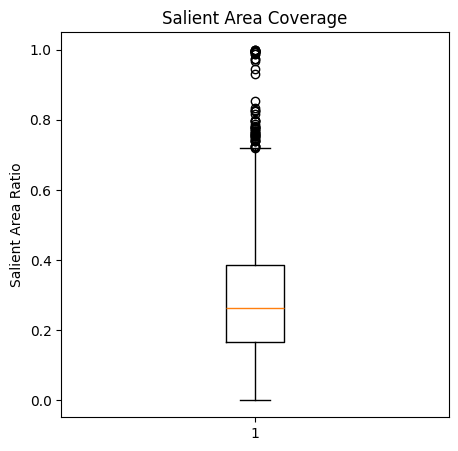

In [ ]:
image_path = train_image_path
mask_path = train_mask_path

images = sorted(os.listdir(image_path))
masks = sorted(os.listdir(mask_path))

print("Train Calculating dimensions...")
dimensions = [(Image.open(os.path.join(image_path, img)).size) for img in tqdm(images)]
widths, heights = zip(*dimensions)

print("Train Calculating salient area ratios...")
salient_area_ratios = []
for mask_file in tqdm(masks):
    mask = Image.open(os.path.join(mask_path, mask_file))
    mask_array = np.array(mask, dtype=np.uint8)
    non_zero_pixels = np.count_nonzero(mask_array)
    total_pixels = mask_array.size
    salient_area_ratios.append(non_zero_pixels / total_pixels)

plt.figure(figsize=(10, 5))

# image widths
plt.subplot(1, 2, 1)
plt.boxplot(widths)
plt.title('Image Widths')
plt.xlabel('Widths')

# image heights
plt.subplot(1, 2, 2)
plt.boxplot(heights)
plt.title('Image Heights')
plt.xlabel('Heights')

plt.show()

# salient area ratios
plt.figure(figsize=(5, 5))
plt.boxplot(salient_area_ratios)
plt.title('Salient Area Coverage')
plt.ylabel('Salient Area Ratio')
plt.show()


#### Detect outliers based on IQR

In [ ]:
def detect_outliers(data):
    q1 = np.percentile(data, 25)  # Q1
    q3 = np.percentile(data, 75)  # Q3
    iqr = q3 - q1  #
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = [x for x in data if x < lower_bound or x > upper_bound]
    return outliers, lower_bound, upper_bound

# Detect outliers for widths, heights, and salient area ratios
width_outliers, width_lb, width_ub = detect_outliers(widths)
height_outliers, height_lb, height_ub = detect_outliers(heights)
salient_outliers, salient_lb, salient_ub = detect_outliers(salient_area_ratios)

print("\nOutlier Detection Results:")
print(f"Width Outliers: {width_outliers}")
print(f"Height Outliers: {height_outliers}")
print(f"Salient Area Outliers: {salient_outliers}")

print("\nBounds:")
print(f"Width Bounds: {width_lb:.2f}, {width_ub:.2f}")
print(f"Height Bounds: {height_lb:.2f}, {height_ub:.2f}")
print(f"Salient Area Bounds: {salient_lb:.4f}, {salient_ub:.4f}")


Outlier Detection Results:
Width Outliers: [269, 313, 268, 300, 300, 315, 268, 300, 300, 300, 300, 266, 267, 268, 297, 268, 320, 300, 300, 270, 283, 300, 300, 322, 267, 308, 271, 282, 309, 320, 300, 300, 300, 326, 267, 300, 300, 267, 300, 267, 286, 267, 259, 300, 321, 320, 268, 300, 267, 300, 267, 315, 300, 300, 300, 268, 320, 320, 300, 320, 317, 268, 300, 300, 240, 300, 267, 267, 300, 318, 300, 300, 300, 300, 320, 269, 286, 289, 300, 268, 300, 300, 300, 267, 300, 300, 327, 267, 316, 320, 306, 328, 315, 306, 268, 300, 302, 324, 320, 300, 300, 300, 300, 320, 308, 268, 286, 309, 308, 300, 300, 267, 320, 300, 300, 267, 267, 268, 300, 300, 309, 301, 324, 300, 314, 300, 324, 320, 308, 300, 300, 300, 300, 267, 268, 304, 267, 300, 267, 300, 302, 267, 322, 320, 300, 274, 320, 326, 320, 300, 300, 267, 300, 300, 320, 300, 300, 300, 319, 320, 300, 267, 312, 320, 267, 300, 286, 300, 303, 300, 308, 267, 300, 300, 300, 317, 316, 300, 312, 300, 286, 267, 300, 300, 300, 300, 300, 300, 300, 300, 267, 

Test Calculating dimensions...


100%|██████████| 5019/5019 [01:12<00:00, 69.70it/s] 


Test Calculating salient area ratios...


100%|██████████| 5019/5019 [00:18<00:00, 272.60it/s]


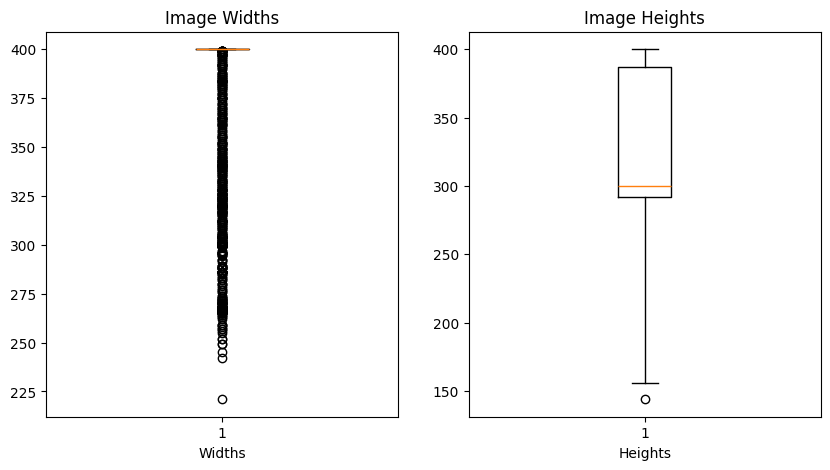

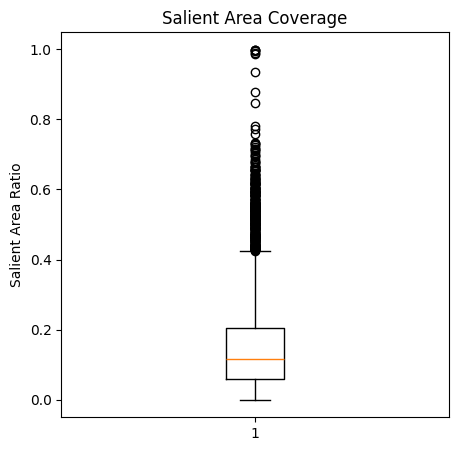

In [ ]:
image_path = test_image_path
mask_path = test_mask_path

images = sorted(os.listdir(image_path))
masks = sorted(os.listdir(mask_path))

print("Test Calculating dimensions...")
dimensions = [(Image.open(os.path.join(image_path, img)).size) for img in tqdm(images)]
widths, heights = zip(*dimensions)

print("Test Calculating salient area ratios...")
salient_area_ratios = []
for mask_file in tqdm(masks):
    mask = Image.open(os.path.join(mask_path, mask_file))
    mask_array = np.array(mask, dtype=np.uint8)
    non_zero_pixels = np.count_nonzero(mask_array)
    total_pixels = mask_array.size
    salient_area_ratios.append(non_zero_pixels / total_pixels)

plt.figure(figsize=(10, 5))

# image widths
plt.subplot(1, 2, 1)
plt.boxplot(widths)
plt.title('Image Widths')
plt.xlabel('Widths')

# image heights
plt.subplot(1, 2, 2)
plt.boxplot(heights)
plt.title('Image Heights')
plt.xlabel('Heights')

plt.show()

# salient area ratios
plt.figure(figsize=(5, 5))
plt.boxplot(salient_area_ratios)
plt.title('Salient Area Coverage')
plt.ylabel('Salient Area Ratio')
plt.show()

In [ ]:
def detect_outliers(data):
    q1 = np.percentile(data, 25)  # Q1
    q3 = np.percentile(data, 75)  # Q3
    iqr = q3 - q1  #
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = [x for x in data if x < lower_bound or x > upper_bound]
    return outliers, lower_bound, upper_bound

# Detect outliers for widths, heights, and salient area ratios
width_outliers, width_lb, width_ub = detect_outliers(widths)
height_outliers, height_lb, height_ub = detect_outliers(heights)
salient_outliers, salient_lb, salient_ub = detect_outliers(salient_area_ratios)

print("\nOutlier Detection Results:")
print(f"Width Outliers: {width_outliers}")
print(f"Height Outliers: {height_outliers}")
print(f"Salient Area Outliers: {salient_outliers}")

print("\nBounds:")
print(f"Width Bounds: {width_lb:.2f}, {width_ub:.2f}")
print(f"Height Bounds: {height_lb:.2f}, {height_ub:.2f}")
print(f"Salient Area Bounds: {salient_lb:.4f}, {salient_ub:.4f}")


Outlier Detection Results:
Width Outliers: [323, 342, 397, 320, 267, 326, 267, 300, 300, 300, 300, 342, 388, 323, 300, 315, 320, 300, 320, 320, 317, 300, 267, 289, 300, 329, 300, 300, 267, 392, 300, 259, 304, 267, 300, 343, 395, 312, 375, 331, 300, 320, 300, 267, 300, 355, 333, 300, 326, 300, 286, 267, 339, 267, 322, 300, 367, 340, 320, 252, 384, 385, 300, 300, 323, 345, 300, 328, 325, 270, 300, 333, 300, 322, 300, 320, 352, 300, 352, 252, 300, 285, 300, 308, 341, 300, 333, 324, 332, 392, 332, 346, 300, 300, 385, 268, 300, 300, 267, 375, 300, 268, 353, 397, 363, 341, 300, 368, 364, 319, 300, 267, 300, 306, 328, 304, 300, 316, 301, 267, 326, 343, 324, 356, 300, 300, 270, 320, 300, 300, 249, 300, 300, 341, 300, 325, 348, 297, 267, 332, 320, 300, 340, 300, 300, 351, 268, 382, 327, 300, 300, 337, 267, 342, 300, 311, 267, 268, 381, 333, 345, 300, 267, 267, 300, 300, 344, 323, 300, 377, 300, 300, 386, 369, 300, 341, 310, 382, 286, 266, 270, 394, 313, 320, 365, 267, 300, 300, 300, 300, 347, 